# Homework 3

### Nick Tyler

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import match
pd.options.mode.chained_assignment = None

In [46]:
fiscal_data = pd.read_csv('./data/Sdf16_1a.txt', sep='\t')
fiscal_data['LEAID'] = fiscal_data['LEAID'].astype(str)
math_data = pd.read_csv('./data/math_data.csv')
math_data['LEAID'] = math_data['LEAID'].astype(str)
all_data = pd.merge(fiscal_data, math_data, on='LEAID')

/home/nick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/nick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Problem 1

Federal Funding Recieved
1 Texas: 6194317000
2 New York: 3374794000
3 Florida: 3147329000
4 Illinois: 2334945000
5 Pennsylvania: 2037315000
6 Ohio: 1837963000
7 Georgia: 1815242000
8 Michigan: 1731034000
9 North Carolina: 1587976000
10 Arizona: 1302010000
11 New Jersey: 1249741000
12 Louisiana: 1115619000
13 Washington: 1098332000
14 Tennessee: 1096182000
15 Virginia: 1058146000
16 Indiana: 1015476000
17 Missouri: 959978000
18 Kentucky: 880296000
19 South Carolina: 860867000
20 Maryland: 823599000
21 Massachusetts: 804595000
22 Alabama: 803907000
23 Wisconsin: 782647000
24 Colorado: 721719000
25 Oklahoma: 703225000
26 Mississippi: 690724000
27 Minnesota: 685055000
28 Arkansas: 606946000
29 Oregon: 582560000
30 New Mexico: 516289000
31 Connecticut: 484186000
32 Iowa: 464852000
33 Kansas: 453922000
34 Utah: 419642000
35 Nevada: 405789000
36 West Virginia: 360283000
37 Nebraska: 346826000
38 Alaska: 307320000
39 Hawaii: 261131000
40 Idaho: 248546000
41 District of Columbia: 226202000
42 M

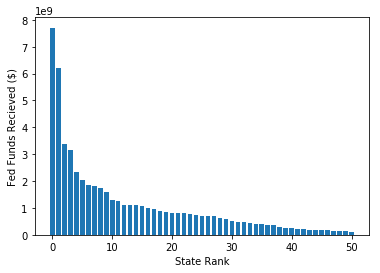

Total Spending Per Student
1 New York: 25235.0
2 Vermont: 24373.0
3 New Jersey: 21641.0
4 Wyoming: 21479.0
5 Connecticut: 20977.0
6 Alaska: 19800.0
7 Pennsylvania: 19216.0
8 Massachusetts: 18335.0
9 North Dakota: 18093.0
10 Rhode Island: 17896.0
11 New Hampshire: 17407.0
12 Delaware: 16452.0
13 Illinois: 16293.0
14 Maryland: 15907.0
15 Minnesota: 15699.0
16 Maine: 15377.0
17 Hawaii: 15017.0
18 Nebraska: 14687.0
19 Ohio: 14287.0
20 Washington: 14048.0
21 California: 13738.0
22 Iowa: 13725.0
23 Wisconsin: 13585.0
24 Michigan: 13086.0
25 Oregon: 13016.0
26 Montana: 12955.0
27 Virginia: 12854.0
28 Louisiana: 12409.0
29 Kansas: 12373.0
30 South Carolina: 12292.0
31 West Virginia: 12239.0
32 Missouri: 11972.0
33 New Mexico: 11580.0
34 Texas: 11575.0
35 Indiana: 11468.0
36 Kentucky: 11341.0
37 Arkansas: 11267.0
38 Colorado: 11186.0
39 Georgia: 11017.0
40 South Dakota: 11012.0
41 Alabama: 10575.0
42 Florida: 10008.0
43 Nevada: 9850.0
44 Tennessee: 9679.0
45 North Carolina: 9652.0
46 Mississipp

In [47]:
state_fed_rev = fiscal_data[["STNAME", "TFEDREV"]].query('TFEDREV>0')
state_fed_rev = state_fed_rev.groupby(["STNAME"]).sum().reset_index()
state_fed_rev = state_fed_rev.sort_values(by="TFEDREV", ascending=False)
print("Federal Funding Recieved")
for i in range(1, 51):
    name, value = state_fed_rev.values[i]
    print(str(i) + " " + name + ": " + str(value))
    
states = state_fed_rev['STNAME'].values
revs = state_fed_rev['TFEDREV'].values
plt.bar(np.arange(len(states)), revs)
plt.xlabel("State Rank")
plt.ylabel("Fed Funds Recieved ($)")
plt.show()

state_spend = fiscal_data[["STNAME", "TOTALEXP", "V33"]].groupby(['STNAME']).sum().reset_index()
state_spend['SPENDPCAP'] = round(state_spend['TOTALEXP'] / state_spend['V33'])
state_spend = state_spend.sort_values(by='SPENDPCAP', ascending=False)[['STNAME', 'SPENDPCAP']]
print("Total Spending Per Student")
for i in range(1, 51):
    name, value = state_spend.values[i]
    print(str(i) + " " + name + ": " + str(value))

## Problem 2

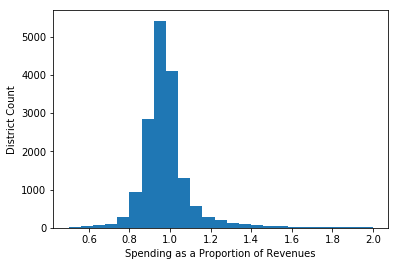

Districts with most debt:
1 Los Angeles Unified: 11037753000
2 City of Chicago SD 299: 7449000000
3 San Diego Unified: 3404587000
4 DADE: 3360733000
5 HOUSTON ISD: 3228418000
6 DALLAS ISD: 3110617000
7 Philadelphia City SD: 2989333000
8 CLARK COUNTY SCHOOL DISTRICT: 2592841000
9 CYPRESS-FAIRBANKS ISD: 2377539000
10 NORTHSIDE ISD: 2234987000


In [48]:
distr_fins = fiscal_data[['LEAID', 'TOTALREV', 'TOTALEXP']].query('TOTALREV>0')
distr_fins['SPENDOFREV'] = distr_fins['TOTALEXP'] / distr_fins['TOTALREV']
spend_percents = distr_fins['SPENDOFREV'].values
plt.hist(spend_percents, bins=25, range=(.5, 2))
plt.xlabel("Spending as a Proportion of Revenues")
plt.ylabel("District Count")
plt.show()

distr_debts = fiscal_data[['NAME', '_41F', '_66V']].copy()
distr_debts['TOTALDEBT'] = distr_debts['_41F'] + distr_debts['_66V']
distr_debts = distr_debts.sort_values(by='TOTALDEBT', ascending=False)[['NAME', 'TOTALDEBT']]
print("Districts with most debt:")
for i in range(1, 11):
    name, debt = distr_debts.values[i]
    print(str(i) + " " + name + ": " + str(debt))


## Problem 3

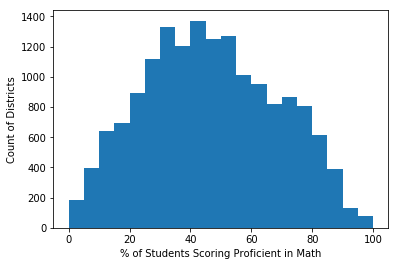

In [50]:
'''
This function iterates through the column of
the dataframe that is passed in and specified
and turns any range of numbers into an average
of the numbers in that range. For values that use
greater than or less than, the range becomes the number 
given, and then either 0 or 100 depending on the sign (<,>)
'''
def unblurr_col(dframe, colname):
    rgx = '([a-zA-Z]*)(\d*)(-*)(\d*)'
    col_data = dframe[[colname]].copy()
    for i in range(len(col_data)):
        val = col_data.iloc[i][0]
        mobj = match(rgx, val)
        
        ltgt, num1, hyph, num2 = mobj.groups()
        num1 = int(num1)
        if ltgt in ['LT', 'LE']:
            num2 = 0
        elif ltgt in ['GT', 'GE']:
            num2 = 100
        elif num2 == '':
            num2 = num1
        else:
            num2 = int(num2)
        final_num = round((num1 + num2) / 2)
        col_data.iloc[i][0] = final_num
    dframe[colname] = col_data
        
math_scores = math_data.query('ALL_MTH00PCTPROF_1516!=\'PS\'')
unblurr_col(math_scores, 'ALL_MTH00PCTPROF_1516')
scores = list(math_scores['ALL_MTH00PCTPROF_1516'].values)
plt.hist(scores, bins=20)
plt.xlabel("% of Students Scoring Proficient in Math")
plt.ylabel("Count of Districts")
plt.show()


## Problem 4

In [61]:
budget = fiscal_data.query('TFEDREV>0')['TFEDREV'].values.sum()
print("Total US Fed Budget:")
print(budget)
budget = int(round(.15 * budget))
print("15% of US Budget:")
print(budget)
cut_data = all_data.query('ALL_MTH00PCTPROF_1516!=\'PS\'')
unblurr_col(cut_data, 'ALL_MTH00PCTPROF_1516')
median_score = int(cut_data['ALL_MTH00PCTPROF_1516'].median())
cutoff = median_score + 5
tot_rev_outperf = cut_data.query(
    'ALL_MTH00PCTPROF_1516>' + str(cutoff)
)['TFEDREV'].sum()
cut_perc = budget / tot_rev_outperf
cut_data['TOCUT'] = cut_data['TFEDREV']
cut_data.loc[cut_data['ALL_MTH00PCTPROF_1516'] <= cutoff, 'TOCUT'] = 0
cut_data.loc[
    cut_data['ALL_MTH00PCTPROF_1516'] > cutoff, 'TOCUT'
] = cut_data.loc[
    cut_data['ALL_MTH00PCTPROF_1516'] > cutoff, 'TOCUT'
].copy() * (cut_perc)

print(cut_data[['LEAID', 'TOCUT']].head(20))

Total US Fed Budget:
55602742000
15% of US Budget:
8340411300
     LEAID         TOCUT
0   100005  0.000000e+00
1   100006  0.000000e+00
2   100007  2.869008e+06
3   100008  2.359580e+06
4   100011  0.000000e+00
5   100012  0.000000e+00
6   100013  4.575898e+05
7   100030  0.000000e+00
8   100060  0.000000e+00
9   100090  0.000000e+00
10  100100  7.276196e+05
11  100120  0.000000e+00
12  100180  0.000000e+00
13  100185  9.646615e+05
14  100188  0.000000e+00
15  100189  5.410021e+05
16  100190  2.000011e+06
17  100194  0.000000e+00
18  100195  0.000000e+00
19  100210  2.092378e+06


## Problem 5

Please see the above federal funding cuts for the US school districts listed by LEAID. These cuts were done based on performances on the most recently available data on standardized mathmatics testing. Districts that were high performing schools were considered to be those that scored higher than 5 points than the median district in terms of percentage of students scoring proficient or better on these tests. 

We are cutting funding only to the districts in this high performance basket. The premise for this logic is that higher performing districts are achieving above average scores relative to their peers, and we are more comfortable with schools moving from above average to average as compared with average to below average or below average to terrible. After determining the amount that needed to be cut from the budget, the districts in the high performing basket will be cut by this total amount, proportinate to the amount of funding they currently receive relative to the other high performing schools.
